In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer




##### Load the pre-split train and test data

In [ ]:
data_train = np.load('C:\\Users\\Mohammad Reza\\Desktop\\Exercise\\simu_20000_0.1_90_140_train_2.npy')
data_test  = np.load('C:\\Users\\Mohammad Reza\\Desktop\\Exercise\\simu_10000_0.1_141_178_test_4.npy')

#### Data preprocessing

In [ ]:
S_train = data_train[:, -2]  # Systolic blood pressure
D_train = data_train[:, -1]

S_test = data_test[:, -2]
D_test = data_test[:, -1]  # Diastolic blood pressure

X_train = data_train[:, :-5]  # Sensor data (excluding ID, Time, Heartrate, Respiratory)
X_test = data_test[:, :-5]

# Fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Train a model using Random Forest Regression

In [ ]:
# Train the model for Systolic blood pressure
model_S = RandomForestRegressor()
model_S.fit(X_train, S_train.ravel())

# Train the model for Diastolic blood pressure
model_D = RandomForestRegressor()
model_D.fit(X_train, D_train.ravel())

# Predict S and D from the test data
S_pred = model_S.predict(X_test)
D_pred = model_D.predict(X_test)

#### Calculate mean absolute error (MAE)

In [ ]:
MAE_S = mean_absolute_error(S_test, S_pred)
MAE_D = mean_absolute_error(D_test, D_pred)

# Print MAE for S and D
print(f"MAE for S: {MAE_S}")
print(f"MAE for D: {MAE_D}")

#### Plot trend comparison of labels and prediction results

MAE for S: 37.307873
MAE for D: 8.842354


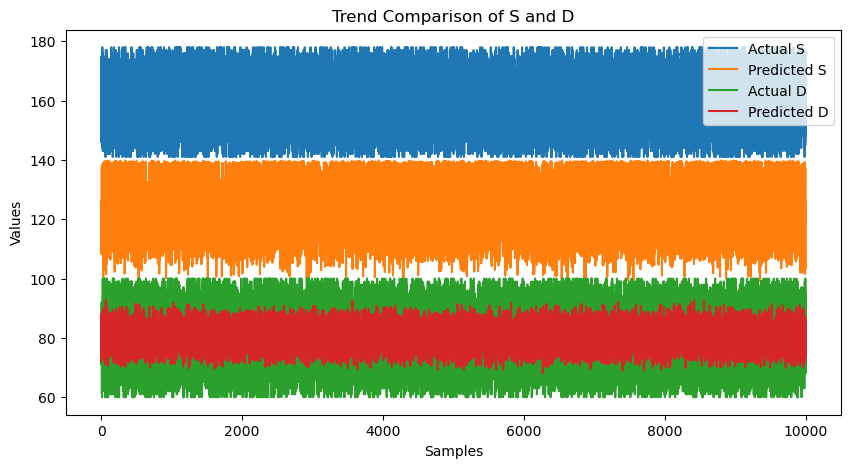

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(S_test, label='Actual S')
plt.plot(S_pred, label='Predicted S')
plt.plot(D_test, label='Actual D')
plt.plot(D_pred, label='Predicted D')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Trend Comparison of S and D')
plt.legend()
plt.show()

####  Sort the results from descending to ascending

MAE for S: 37.307873
MAE for D: 6.116594


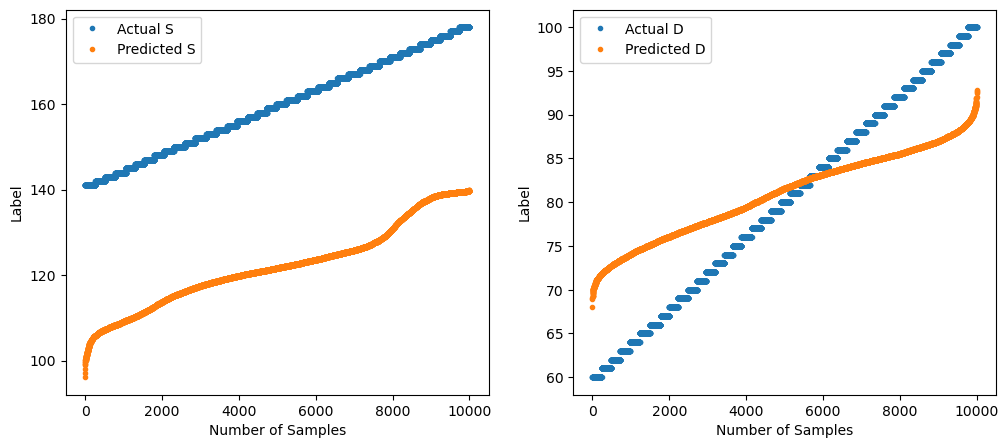

In [55]:
sort_indices_S_test = np.argsort(S_test)
sort_indices_S_pred = np.argsort(S_pred)
sort_indices_D_test = np.argsort(D_test)
sort_indices_D_pred = np.argsort(D_pred)

S_test_sorted = S_test[sort_indices_S_test]
S_pred_sorted = S_pred[sort_indices_S_pred]
D_test_sorted = D_test[sort_indices_D_test]
D_pred_sorted = D_pred[sort_indices_D_pred]

# Calculate mean absolute error (MAE)
MAE_S = mean_absolute_error(S_test_sorted, S_pred_sorted)
MAE_D = mean_absolute_error(D_test_sorted, D_pred_sorted)

# Print MAE for S and D
print(f"MAE for S: {MAE_S}")
print(f"MAE for D: {MAE_D}")

# Plot trend comparison of labels and prediction results
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(range(len(S_test_sorted)), S_test_sorted, '.', label='Actual S')
ax1.plot(range(len(S_pred_sorted)), S_pred_sorted, '.', label='Predicted S')
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Label')
ax1.legend()
ax2.plot(range(len(D_test_sorted)), D_test_sorted, '.', label='Actual D')
ax2.plot(range(len(D_pred_sorted)), D_pred_sorted, '.', label='Predicted D')
ax2.set_xlabel('Number of Samples')
ax2.set_ylabel('Label')
ax2.legend()
plt.show()